# Ignition delay simulation of complete n-c10 RMG model without the low temperature pathways and sensitvity analysis 

In [1]:
import sys
sys.path.append('/scratch/ajulu.c/anaconda3/envs/rmg_py3')

In [2]:
!which python
# !conda list rmg_py3

/scratch/ajulu.c/anaconda3/envs/rmg_py3/bin/python


In [3]:
import cantera as ct
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

ct.__version__

'2.4.0'

In [4]:
# from cantera import ck2cti

# ck2cti.main([
#     '--input=/scratch/ajulu.c/Code/GTL/nc10/nc10_lowT/no_lowT/chemkin/chem_annotated.inp',
#     '--tran=/scratch/ajulu.c/Code/GTL/nc10/nc10_lowT/no_lowT/chemkin/tran.dat',
#     '--output=/scratch/ajulu.c/Code/GTL/nc10/nc10_lowT/no_lowT/chemkin/chem.cti',
#     '--permissive'])

In [5]:
gas = ct.Solution('/scratch/ajulu.c/Code/GTL/nc10/nc10_lowT/no_lowT/chemkin/chem.cti')



**** WARNING ****
For species HOCHO(59), discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  -40.3604
	Value computed using high-temperature polynomial: -38.1678


In [6]:
print(len(gas.species()), len(gas.reactions()))

331 7381


In [7]:
sorted(gas.species_names)

['Ar',
 'C(32)',
 'C2(52)',
 'C2H(4)',
 'C2H2(33)',
 'C2H2O(730)',
 'C2H3(31)',
 'C2H3CO(84)',
 'C2H3O2(46)',
 'C2H3O2(68)',
 'C2H3O2(98)',
 'C2H3O3(60)',
 'C2H3O3(74)',
 'C2H3O3(75)',
 'C2H3O3(94)',
 'C2H3O3(97)',
 'C2H4(11)',
 'C2H4(752)',
 'C2H4O(42)',
 'C2H4O2(64)',
 'C2H4O2(96)',
 'C2H4O3(67)',
 'C2H4O4(93)',
 'C2H5(30)',
 'C2H5CO(86)',
 'C2H5O(38)',
 'C2H5O(43)',
 'C2H5O(55)',
 'C2H5O(88)',
 'C2H5O2(39)',
 'C2H5O2(45)',
 'C2H5O2(63)',
 'C2H5O2(95)',
 'C2H5O3(56)',
 'C2H5O3(89)',
 'C2H5O3(91)',
 'C2H5O5(92)',
 'C2H6(36)',
 'C2H6O(54)',
 'C2H6O(87)',
 'C2H6O2(62)',
 'C2H6O3(90)',
 'C2O(53)',
 'C3H3(77)',
 'C3H4(174)',
 'C3H4O(83)',
 'C3H5(103)',
 'C3H5(109)',
 'C3H5(110)',
 'C3H5O(137)',
 'C3H5O(140)',
 'C3H5O(175)',
 'C3H5O(79)',
 'C3H5O2(80)',
 'C3H5O3(81)',
 'C3H6(12)',
 'C3H6(753)',
 'C3H6O(125)',
 'C3H6O(126)',
 'C3H6O(78)',
 'C3H6O(85)',
 'C3H6O3(82)',
 'C3H7O(187)',
 'C3H7O(188)',
 'C3H8(100)',
 'C4H2(118)',
 'C4H3(116)',
 'C4H4(121)',
 'C4H5(114)',
 'C4H5(115)',
 'C4H5(117)

In [8]:
for species in gas.species():
    if species.composition == {'C':10,'H':22}:
        print(species.name)

nC10H22(1)


In [9]:
species_names = {
    'nc10':'nC10H22(1)',
    'Ar':'Ar',
    'N2':'N2',
    'O2':'O2(2)',
    'O':'O(5)',
    'C2H':'C2H(4)',
    'OH':'OH(15)'
}

In [10]:
for s in species_names.values():
    assert s in gas.species_names, "{} not found".format(s)

In [11]:
gas.TP = 1000, 10e5
gas.set_equivalence_ratio(phi=1.0, fuel = species_names['nc10'], 
                          oxidizer = {species_names['O2']:0.21,
                                      species_names['N2']:0.79})
gas()


  gas:

       temperature            1000  K
          pressure           1e+06  Pa
           density         3.65228  kg/m^3
  mean mol. weight         30.3667  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      7.2319e+05        2.196e+07     J
   internal energy      4.4938e+05        1.365e+07     J
           entropy          7490.6        2.275e+05     J/K
    Gibbs function     -6.7675e+06       -2.055e+08     J
 heat capacity c_p          1313.4        3.988e+04     J/K
 heat capacity c_v          1039.6        3.157e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2        0.77944         0.719038         -22.8116
        nC10H22(1)      0.0133673        0.0626331         -118.441
             O2(2)       0.207193         0.218329         -25.8365
     [ +328 minor]          

In [12]:
# def get_mole_fractions(phi):
#     """
#     The paper comparison comes from Titova et al. doi:10.1134/S0010508211020018 
#     Kinetic Mechanisms of n_Decane Oxidation compared n-decane mechanisms to shock tube experiments of 
#     D.C. Horning PhD Thesis of High-temperature auto-ignition and thermal decomposition of hydrocarbons
#     0.2% nc10 in 3.1%O2/Ar mixture
#     """
    

#     fraction_nc10 = 0.002
#     fraction_O2 = 15.5 * fraction_nc10 / phi
#     fraction_Ar = 1 - (fraction_nc10 + fraction_O2)
    
#     X = {species_names['nc10']:fraction_nc10,
#         species_names['O2']:fraction_O2,
#         species_names['Ar']:fraction_Ar}
    
#     return X
# gas.X = get_mole_fractions(phi=1.0)
# gas()

# This section computes the OH sensitivity of the first 20 reactions 

In [13]:
def get_sensitivities(gas, TPX, max_n=None):
    """
    Get sensitivity of OH with respect to k for the first max_n reactions.
    """
    gas.TPX = TPX
    reactor = ct.IdealGasReactor(gas)
    reactor_network = ct.ReactorNet([reactor])

    # number of reactions to consider
    if max_n is None:
        global n_sens
        n_sens = len(gas.reactions())
    else:
        n_sens = min(max_n, len(gas.reactions()))

    for i in range(n_sens):
        reactor.add_sensitivity_reaction(i)

    reactor_network.step()
    
    oh_sensitivities = np.zeros(n_sens)
    for i in range(n_sens):
        oh_sensitivities[i] = reactor_network.sensitivity(species_names['OH'], i)

    global ranking 
    
    ranking = list(reversed(np.argsort(np.abs(oh_sensitivities))))

    print(f"Top 20 sensitivities (of the first {n_sens} considered)")
    for i, j in enumerate(ranking[:20]):
        print(i, j,
              reactor_network.sensitivity_parameter_name(j), 
              oh_sensitivities[j]
             )
    
    return oh_sensitivities

## The ignition delay function is defined here with the sensitivity argument given as an option

In [14]:
def get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=False, sensitivity=False):
    """
    A general function to find the igniton delay.
    Using C2H + O --> CH* as the indication of ignition
    
    gas is a cantera Solution object
    temperature in K
    pressure_bar is in bar
    mole_fractions is a dict
    
    sensitivity is Boolean, whether to run sensitivity analysis
    """
    gas.TPX = temperature, pressure_bar*1e5, mole_fractions

    reactor = ct.IdealGasReactor(gas)
    reactor_network = ct.ReactorNet([reactor])
    
    time = 0.0
    end_time = 100e-3
    
    times = []
    concentrations = []
    pressures = []
    temperatures = []

    # set the tolerances for the solution and for the sensitivity coefficients
    reactor_network.rtol = 1.0e-6
    reactor_network.atol = 1.0e-15
    reactor_network.rtol_sensitivity = 1.0e-6
    reactor_network.atol_sensitivity = 1.0e-6
            
    print_data = True
    sensitivity_done = False
    while time < end_time:
        time = reactor_network.time
        times.append(time)
        temperatures.append(reactor.T)
        pressures.append(reactor.thermo.P)
        concentrations.append(reactor.thermo.concentrations)
        
        # take a timestep
        # the size of the step will be determined by the ODE solver
        # depending on how quickly things are changing.
        reactor_network.step()
        
        # Some timestep:
        if sensitivity and not sensitivity_done:
            if reactor.T > temperature + 100: # do it when T has risen 100K above start point
                global TPX_for_sensitivity
                TPX_for_sensitivity = gas.TPX
                global time_for_sensitivity
                time_for_sensitivity = time
                sensitivity_done = True # just do it once
        
    print("Reached end time {0:.2f} ms in {1} steps".format(times[-1]*1e3, len(times)))
    # convert the lists into arrays
    concentrations = np.array(concentrations)
    times = np.array(times)
    pressures = np.array(pressures)
    temperatures = np.array(temperatures)

    if plot:
        plt.subplot(2,1,1)
        plt.plot(times*1e3, pressures/1e5)
        plt.ylabel("Pressure (bar)", color='b')
        ax2 = plt.gca().twinx()
        ax2.set_ylabel('Temperature (K)', color='r')
        ax2.plot(times*1e3, temperatures, 'r')
    # Using C2H + O --> CH* as the indication of ignition
    i_c2h = gas.species_index(species_names['C2H'])   
    i_o = gas.species_index(species_names['O'])
    excited_ch_generation = concentrations[:,i_o] * concentrations[:,i_c2h]
    if plot:
        plt.subplot(2,1,2)
        plt.plot(times*1e3, excited_ch_generation, 'g')
        plt.ylabel("CH* emission")
        plt.ylim(0,max(1e-13,1.1*max(excited_ch_generation)))
        plt.xlabel("Time (ms)")
        plt.tight_layout()
        plt.show()
    step_with_highest_ch_gen = excited_ch_generation.argmax()
        
    if step_with_highest_ch_gen > 1 and excited_ch_generation.max()>1e-20:
        ignition_time_ms = 1e3 * times[step_with_highest_ch_gen]
        print("At {0} K {1} bar, ignition delay time is {2} ms".format(temperature, pressure_bar, ignition_time_ms))
    else:
        print("At {0} K {1} bar, no ignition detected".format(temperature, pressure_bar))
        ignition_time_ms = np.infty
    
    print(f"Performing sensitivity at time {time_for_sensitivity/1000} ms at {gas.T} K, {gas.P} Pa")
    print()
    get_sensitivities(gas, TPX_for_sensitivity)
    
    return ignition_time_ms

In [15]:
# def get_ignition_delay_ar(temperature, pressure_bar, phi, plot=False):
#     """
#     The paper comparison comes from Titova et al. doi:10.1134/S0010508211020018 
#     Kinetic Mechanisms of n_Decane Oxidation compared n-decane mechanisms to shock tube experiments of 
#     D.C. Horning PhD Thesis of High-temperature auto-ignition and thermal decomposition of hydrocarbons
#     0.2% nc10 in 3.1%O2/Ar mixture.
#     Ignition delay time condition is at P = 1.2 - 1.3 atm between 1400 - 1550 K
#     """
    
#     gas.TP = temperature, pressure_bar*1e5
    
#     mole_fractions = get_mole_fractions(phi)
    
#     if plot:
#         gas()
        
#     time = get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=plot)

#     return time
    


In [16]:
def get_ignition_delay_n2(temperature, pressure_bar, phi, plot=False,sensitivity=False):
    """
    The paper comparison comes from Pfahl et al and Zhukov et al. --> DOI: 10.1016/j.combustflame.2007.09.006 
    Autoignition of n_Decane at high pressure and self-ignition of diesel relevant hydro-carbon-ar mixtures under 
    engine relevant conditions; compared n-decane mechanisms to shock tube experiments of Zhukov and Pfahl respectively. 
    nc10 in air mixtures between phi = [0.5 1.0 2.0] for pressures at 13 and 50 bar
    Ignition delay time condition is at P = 13 - 50 bar between 666 - 1450 K
    """
    
    gas.TP = temperature, pressure_bar*1e5
    
    gas.set_equivalence_ratio(phi=phi, fuel = species_names['nc10'], 
                              oxidizer = {species_names['O2']:0.21,
                                      species_names['N2']:0.79})
                              
    mole_fractions = gas.X
                              
    if plot:
        gas()
        
    time = get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=plot, sensitivity=sensitivity)

    return time
    


  gas:

       temperature         833.333  K
          pressure           5e+06  Pa
           density         21.9137  kg/m^3
  mean mol. weight         30.3667  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      5.0863e+05        1.545e+07     J
   internal energy      2.8046e+05        8.517e+06     J
           entropy          6815.4         2.07e+05     J/K
    Gibbs function     -5.1709e+06        -1.57e+08     J
 heat capacity c_p          1259.7        3.825e+04     J/K
 heat capacity c_v           985.9        2.994e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2        0.77944         0.719038         -20.7541
        nC10H22(1)      0.0133673        0.0626331         -117.026
             O2(2)       0.207193         0.218329          -23.754
     [ +328 minor]          

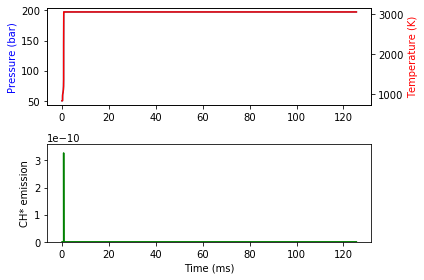

At 833.3333333333334 K 50 bar, ignition delay time is 0.6799140919509198 ms
Performing sensitivity at time 2.3015218075864307e-07 ms at 3051.120243455319 K, 19737953.937618155 Pa

Top 20 sensitivities (of the first 7381 considered)
0 975 IdealGasReactor_2: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -0.00010326097215868199
1 18 IdealGasReactor_2: HO2(17) + OH(15) <=> H2O(8) + O2(2) -4.210983265172249e-05
2 54 IdealGasReactor_2: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -4.056108790729683e-05
3 1947 IdealGasReactor_2: OH(15) + S(1032) <=> S(1043) 3.832118441676825e-05
4 188 IdealGasReactor_2: CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2) -2.6461099101238954e-05
5 7300 IdealGasReactor_2: OH(15) + S(15476) <=> S(30358) 2.5403621219187572e-05
6 1163 IdealGasReactor_2: S(1039) <=> OH(15) + S(1404) 2.4675177565290142e-05
7 966 IdealGasReactor_2: S(449) <=> OH(15) + S(459) 2.2017448560621623e-05
8 443 IdealGasReactor_2: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) + OH(15) 1.8753003082337084e-05
9 1161 IdealGas

In [17]:
initial_idt = get_ignition_delay_n2(1000/1.2, 50, 1, plot=True, sensitivity=True)
plt.rcParams['figure.figsize'] = [10, 8]



In [18]:
# Get the best of both ggplot and seaborn
plt.style.use('ggplot')
plt.style.use('seaborn-deep')

plt.rcParams['figure.autolayout'] = True
import pandas as pd

In [19]:
# Create a dataframe to store sensitivity-analysis data
sensitivities = pd.DataFrame(data=[], index=gas.reaction_equations(ranking[:20]))

In [20]:
# Create an empty column to store the sensitivities data
sensitivities["baseCase"] = ""

In [21]:
# top_20_rxns = [975,18,54,1947,188,7300,1163,966,443,1161,1831,2437,2129,361,1931,360,1158,498,1742,4195]

dk = 1e-1 #perturb the oh_sensitivities

for i, j in enumerate(ranking[:20]):
    print(gas.reaction(j))
    gas.set_multiplier(1.0+dk,j)
    print(f"Multiplying reaction {j} rate constant by {dk} in {gas.reaction(j)}")


    new_idt = get_ignition_delay_n2(1000/1.2, 50, 1, plot=False, sensitivity=False)
    sensitivities["baseCase"][i] = (new_idt - initial_idt)/(initial_idt*dk)
    
gas.set_multiplier(1.0)

OH(15) + nC10H22(1) <=> H2O(8) + S(692)
Multiplying reaction 975 rate constant by 0.1 in OH(15) + nC10H22(1) <=> H2O(8) + S(692)
Reached end time 22.50 ms in 2861 steps
At 833.3333333333334 K 50 bar, ignition delay time is 0.6585813892545952 ms
Performing sensitivity at time 2.3015218075864307e-07 ms at 3050.926182477911 K, 19736084.963447828 Pa

Top 20 sensitivities (of the first 7381 considered)
0 975 IdealGasReactor_4: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -2.8951581733970763e-05
1 18 IdealGasReactor_4: HO2(17) + OH(15) <=> H2O(8) + O2(2) -1.0733157702794483e-05
2 54 IdealGasReactor_4: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -1.0338532246013701e-05
3 1947 IdealGasReactor_4: OH(15) + S(1032) <=> S(1043) 9.767509368922497e-06
4 188 IdealGasReactor_4: CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2) -6.744622044239448e-06
5 7300 IdealGasReactor_4: OH(15) + S(15476) <=> S(30358) 6.475037899578616e-06
6 1163 IdealGasReactor_4: S(1039) <=> OH(15) + S(1404) 6.29042826634318e-06
7 966 IdealGasReact

Reached end time 29.89 ms in 2949 steps
At 833.3333333333334 K 50 bar, ignition delay time is 0.6781888953720696 ms
Performing sensitivity at time 2.3015218075864307e-07 ms at 3051.015693546583 K, 19736935.883070543 Pa

Top 20 sensitivities (of the first 7381 considered)
0 975 IdealGasReactor_12: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -1.4006354563746587e-07
1 18 IdealGasReactor_12: HO2(17) + OH(15) <=> H2O(8) + O2(2) -5.711802746718521e-08
2 54 IdealGasReactor_12: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -5.501820146443239e-08
3 1947 IdealGasReactor_12: OH(15) + S(1032) <=> S(1043) 5.197905622162507e-08
4 188 IdealGasReactor_12: CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2) -3.5892628350208985e-08
5 7300 IdealGasReactor_12: OH(15) + S(15476) <=> S(30358) 3.132525354202717e-08
6 1163 IdealGasReactor_12: S(1039) <=> OH(15) + S(1404) 3.04339077527903e-08
7 966 IdealGasReactor_12: S(449) <=> OH(15) + S(459) 2.719493589498472e-08
8 443 IdealGasReactor_12: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) + 

Reached end time 34.84 ms in 2971 steps
At 833.3333333333334 K 50 bar, ignition delay time is 0.6864312986014529 ms
Performing sensitivity at time 2.3015218075864307e-07 ms at 3051.060827849688 K, 19737352.924382277 Pa

Top 20 sensitivities (of the first 7381 considered)
0 975 IdealGasReactor_20: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -1.2942347293979428e-07
1 18 IdealGasReactor_20: HO2(17) + OH(15) <=> H2O(8) + O2(2) -5.27789971625125e-08
2 54 IdealGasReactor_20: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -5.083868675928953e-08
3 1947 IdealGasReactor_20: OH(15) + S(1032) <=> S(1043) 4.80304127004877e-08
4 188 IdealGasReactor_20: CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2) -3.3166007667299596e-08
5 7300 IdealGasReactor_20: OH(15) + S(15476) <=> S(30358) 3.184015750150005e-08
6 1163 IdealGasReactor_20: S(1039) <=> OH(15) + S(1404) 3.093415941678642e-08
7 966 IdealGasReactor_20: S(449) <=> OH(15) + S(459) 2.764194221415186e-08
8 443 IdealGasReactor_20: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) + O

Reached end time 35.23 ms in 3088 steps
At 833.3333333333334 K 50 bar, ignition delay time is 0.6830816073174233 ms
Performing sensitivity at time 2.3015218075864307e-07 ms at 3051.0482362424927 K, 19737228.43633289 Pa

Top 20 sensitivities (of the first 7381 considered)
0 975 IdealGasReactor_28: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -1.2849959477709955e-07
1 18 IdealGasReactor_28: HO2(17) + OH(15) <=> H2O(8) + O2(2) -5.240223908733333e-08
2 54 IdealGasReactor_28: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -5.047577937870768e-08
3 1947 IdealGasReactor_28: OH(15) + S(1032) <=> S(1043) 4.76875513498795e-08
4 188 IdealGasReactor_28: CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2) -3.292925493619818e-08
5 7300 IdealGasReactor_28: OH(15) + S(15476) <=> S(30358) 3.161286918321556e-08
6 1163 IdealGasReactor_28: S(1039) <=> OH(15) + S(1404) 3.07133384225146e-08
7 966 IdealGasReactor_28: S(449) <=> OH(15) + S(459) 2.744462282462022e-08
8 443 IdealGasReactor_28: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) + OH

Reached end time 22.57 ms in 3219 steps
At 833.3333333333334 K 50 bar, ignition delay time is 0.6799921337269312 ms
Performing sensitivity at time 2.3015218075864307e-07 ms at 3051.069625977883 K, 19737450.738099366 Pa

Top 20 sensitivities (of the first 7381 considered)
0 975 IdealGasReactor_36: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -9.351910391751904e-08
1 18 IdealGasReactor_36: HO2(17) + OH(15) <=> H2O(8) + O2(2) -3.813716647758831e-08
2 54 IdealGasReactor_36: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -3.673513278791015e-08
3 1947 IdealGasReactor_36: OH(15) + S(1032) <=> S(1043) 3.4705923382204915e-08
4 188 IdealGasReactor_36: CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2) -2.3965168561381694e-08
5 7300 IdealGasReactor_36: OH(15) + S(15476) <=> S(30358) 2.3007132455858714e-08
6 1163 IdealGasReactor_36: S(1039) <=> OH(15) + S(1404) 2.2352476284710405e-08
7 966 IdealGasReactor_36: S(449) <=> OH(15) + S(459) 1.9973589289608114e-08
8 443 IdealGasReactor_36: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6

In [22]:
sensitivities.head()

,baseCase
OH(15) + nC10H22(1) <=> H2O(8) + S(692),-0.313756
HO2(17) + OH(15) <=> H2O(8) + O2(2),-0.114614
CH2O(9) + OH(15) <=> H2O(8) + HCO(20),-0.0935218
OH(15) + S(1032) <=> S(1043),-0.118851
CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2),-0.0253737


#### The sensitivity of the OH concentration is a measure in the change of the rate constant of the ignition delay time before scaling and the ignition delay time after the rate constant has been scaled by a factor of 1+dk where dk = 1e-2 with respect to the scaling factor dk times the initial ignition delay time

Text(0.5, 0, 'Sensitivity: $\\frac{\\partial\\:\\ln{(\\tau_{ign}=t([CH^*]_{max}))}}{\\partial\\:\\ln{k}}$')

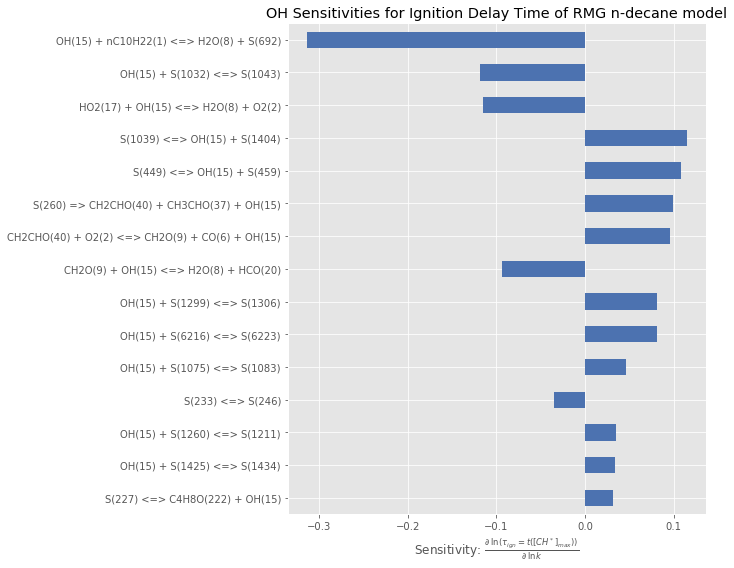

In [23]:
# Reaction mechanisms can contains thousands of elementary steps. Choose a threshold
# to see only the top few
threshold = 0.03

firstColumn = sensitivities.columns[0]

# For plotting, collect only those steps that are above the threshold
# Otherwise, the y-axis gets crowded and illegible
sensitivitiesSubset = sensitivities[sensitivities[firstColumn].abs() > threshold]
indicesMeetingThreshold = sensitivitiesSubset[firstColumn].abs().sort_values(ascending=False).index
sensitivitiesSubset.loc[indicesMeetingThreshold].plot.barh(title="OH Sensitivities for Ignition Delay Time of RMG n-decane model",
                                                          legend=None)
plt.gca().invert_yaxis()

plt.rcParams.update({'axes.labelsize': 20})
plt.xlabel(r'Sensitivity: $\frac{\partial\:\ln{(\tau_{ign}=t([CH^*]_{max}))}}{\partial\:\ln{k}}$')


# Uncomment the following to save the plot. A higher than usual resolution (dpi) helps
# plt.savefig('sensitivityPlot', dpi=300)

In [28]:
gas()
gas.TPX = 1500, 13*ct.one_atm, 'nc10H22(1):1.0, O2(2):1.0, N2:3.76'
print(np.nonzero(np.isnan(gas.forward_rate_constants)))


  gas:

       temperature            1500  K
          pressure     1.31722e+06  Pa
           density         3.20725  kg/m^3
  mean mol. weight         30.3667  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      1.4095e+06         4.28e+07     J
   internal energy      9.9878e+05        3.033e+07     J
           entropy          7970.3         2.42e+05     J/K
    Gibbs function     -1.0546e+07       -3.202e+08     J
 heat capacity c_p          1417.7        4.305e+04     J/K
 heat capacity c_v          1143.9        3.474e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2        0.77944         0.719038         -23.6876
        nC10H22(1)      0.0133673        0.0626331         -124.636
             O2(2)       0.207193         0.218329         -26.7805
     [ +328 minor]          

Reached end time 47.78 ms in 1591 steps
At 1538.4615384615383 K 13 bar, ignition delay time is 0.009899896313672014 ms
Performing sensitivity at time 2.3012565465489694e-07 ms at 3251.0598934545724 K, 3057217.6057082247 Pa

Top 20 sensitivities (of the first 7381 considered)
0 975 IdealGasReactor_44: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -1.0237130961517976e-05
1 18 IdealGasReactor_44: HO2(17) + OH(15) <=> H2O(8) + O2(2) -4.174339370367281e-06
2 54 IdealGasReactor_44: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -4.0206278591175525e-06
3 1947 IdealGasReactor_44: OH(15) + S(1032) <=> S(1043) 3.798848833071576e-06
4 188 IdealGasReactor_44: CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2) -2.6230718234259393e-06
5 7300 IdealGasReactor_44: OH(15) + S(15476) <=> S(30358) 2.518218828291539e-06
6 1163 IdealGasReactor_44: S(1039) <=> OH(15) + S(1404) 2.4468503475154367e-06
7 966 IdealGasReactor_44: S(449) <=> OH(15) + S(459) 2.185832146429579e-06
8 443 IdealGasReactor_44: CH2CHO(40) + O2(2) <=> CH2O(9) + C

Reached end time 58.44 ms in 2325 steps
At 1048.689138576779 K 13 bar, ignition delay time is 3.3130776593661055 ms
Performing sensitivity at time 2.3012565465489694e-07 ms at 3062.5628319756647 K, 4149373.604787191 Pa

Top 20 sensitivities (of the first 7381 considered)
0 975 IdealGasReactor_54: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -1.0237130961517976e-05
1 18 IdealGasReactor_54: HO2(17) + OH(15) <=> H2O(8) + O2(2) -4.174339370367281e-06
2 54 IdealGasReactor_54: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -4.0206278591175525e-06
3 1947 IdealGasReactor_54: OH(15) + S(1032) <=> S(1043) 3.798848833071576e-06
4 188 IdealGasReactor_54: CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2) -2.6230718234259393e-06
5 7300 IdealGasReactor_54: OH(15) + S(15476) <=> S(30358) 2.518218828291539e-06
6 1163 IdealGasReactor_54: S(1039) <=> OH(15) + S(1404) 2.4468503475154367e-06
7 966 IdealGasReactor_54: S(449) <=> OH(15) + S(459) 2.185832146429579e-06
8 443 IdealGasReactor_54: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6)

Reached end time 21.90 ms in 3245 steps
At 795.4545454545455 K 13 bar, ignition delay time is 7.500596930637737 ms
Performing sensitivity at time 2.3012565465489694e-07 ms at 2959.5543363414613 K, 5241190.335413317 Pa

Top 20 sensitivities (of the first 7381 considered)
0 975 IdealGasReactor_64: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -1.0237130961517976e-05
1 18 IdealGasReactor_64: HO2(17) + OH(15) <=> H2O(8) + O2(2) -4.174339370367281e-06
2 54 IdealGasReactor_64: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -4.0206278591175525e-06
3 1947 IdealGasReactor_64: OH(15) + S(1032) <=> S(1043) 3.798848833071576e-06
4 188 IdealGasReactor_64: CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2) -2.6230718234259393e-06
5 7300 IdealGasReactor_64: OH(15) + S(15476) <=> S(30358) 2.518218828291539e-06
6 1163 IdealGasReactor_64: S(1039) <=> OH(15) + S(1404) 2.4468503475154367e-06
7 966 IdealGasReactor_64: S(449) <=> OH(15) + S(459) 2.185832146429579e-06
8 443 IdealGasReactor_64: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6) 

Reached end time 21.92 ms in 1768 steps
At 1538.4615384615383 K 50 bar, ignition delay time is 0.004081792880004675 ms
Performing sensitivity at time 2.3012565465489694e-07 ms at 3382.76324364815 K, 12133118.50789283 Pa

Top 20 sensitivities (of the first 7381 considered)
0 975 IdealGasReactor_74: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -1.0237130961517976e-05
1 18 IdealGasReactor_74: HO2(17) + OH(15) <=> H2O(8) + O2(2) -4.174339370367281e-06
2 54 IdealGasReactor_74: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -4.0206278591175525e-06
3 1947 IdealGasReactor_74: OH(15) + S(1032) <=> S(1043) 3.798848833071576e-06
4 188 IdealGasReactor_74: CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2) -2.6230718234259393e-06
5 7300 IdealGasReactor_74: OH(15) + S(15476) <=> S(30358) 2.518218828291539e-06
6 1163 IdealGasReactor_74: S(1039) <=> OH(15) + S(1404) 2.4468503475154367e-06
7 966 IdealGasReactor_74: S(449) <=> OH(15) + S(459) 2.185832146429579e-06
8 443 IdealGasReactor_74: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6

Reached end time 21.71 ms in 2217 steps
At 1048.689138576779 K 50 bar, ignition delay time is 0.49754050069609707 ms
Performing sensitivity at time 2.3012565465489694e-07 ms at 3159.0666104083075 K, 16357849.12643791 Pa

Top 20 sensitivities (of the first 7381 considered)
0 975 IdealGasReactor_84: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -1.0237130961517976e-05
1 18 IdealGasReactor_84: HO2(17) + OH(15) <=> H2O(8) + O2(2) -4.174339370367281e-06
2 54 IdealGasReactor_84: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -4.0206278591175525e-06
3 1947 IdealGasReactor_84: OH(15) + S(1032) <=> S(1043) 3.798848833071576e-06
4 188 IdealGasReactor_84: CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2) -2.6230718234259393e-06
5 7300 IdealGasReactor_84: OH(15) + S(15476) <=> S(30358) 2.518218828291539e-06
6 1163 IdealGasReactor_84: S(1039) <=> OH(15) + S(1404) 2.4468503475154367e-06
7 966 IdealGasReactor_84: S(449) <=> OH(15) + S(459) 2.185832146429579e-06
8 443 IdealGasReactor_84: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6

Reached end time 22.29 ms in 3269 steps
At 795.4545454545455 K 50 bar, ignition delay time is 0.9166217675643776 ms
Performing sensitivity at time 2.3012565465489694e-07 ms at 3029.785853647375 K, 20501695.521386992 Pa

Top 20 sensitivities (of the first 7381 considered)
0 975 IdealGasReactor_94: OH(15) + nC10H22(1) <=> H2O(8) + S(692) -1.0237130961517976e-05
1 18 IdealGasReactor_94: HO2(17) + OH(15) <=> H2O(8) + O2(2) -4.174339370367281e-06
2 54 IdealGasReactor_94: CH2O(9) + OH(15) <=> H2O(8) + HCO(20) -4.0206278591175525e-06
3 1947 IdealGasReactor_94: OH(15) + S(1032) <=> S(1043) 3.798848833071576e-06
4 188 IdealGasReactor_94: CH3OO(28) + OH(15) <=> CH3OH(23) + O2(2) -2.6230718234259393e-06
5 7300 IdealGasReactor_94: OH(15) + S(15476) <=> S(30358) 2.518218828291539e-06
6 1163 IdealGasReactor_94: S(1039) <=> OH(15) + S(1404) 2.4468503475154367e-06
7 966 IdealGasReactor_94: S(449) <=> OH(15) + S(459) 2.185832146429579e-06
8 443 IdealGasReactor_94: CH2CHO(40) + O2(2) <=> CH2O(9) + CO(6)

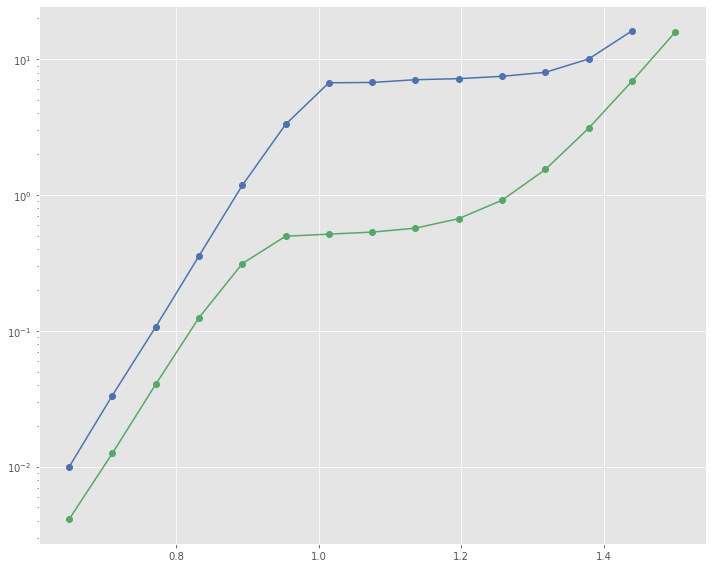

In [24]:
RMG_temperatures_dkm = 1000/np.linspace(0.65,1.5,15)
pressures_bar = [13, 50]
phi = 1.0

RMG_results = dict()

for P in pressures_bar:
    ignition_delay_times = np.zeros_like(RMG_temperatures_dkm)
    for i, T in enumerate(RMG_temperatures_dkm):
        ignition_delay_times[i] = get_ignition_delay_n2(T,P,phi,plot=False,sensitivity=False)
    
    RMG_results[P] = ignition_delay_times 
    
    plt.semilogy(1000/RMG_temperatures_dkm, ignition_delay_times, 'o-', label='{0}'.format(P))


In [20]:
import pickle 


pickle_out = open('n-c10-dkm.pickle', 'wb')
pickle.dump(RMG_results, pickle_out)
pickle_out.close()

In [ ]:
# exp_nc10 = """0.659295    0.122155
# 0.679932    0.180035
# 0.686702    0.232651
# 0.691658    0.282004
# 0.697209    0.309786
# 0.715798    0.457250
# """


# ign_times = []
# temps = []


# for x in exp_nc10.splitlines():
#     temp, time = x.split()
#     ign_times.append(float(time))
#     temps.append(float(temp))
# temps = np.array(temps)
# ign_times = np.array(ign_times)

In [25]:
# extracted values of experimental ignition delay times for iso-octane in air from Pfhal et al @ 13 bar 
# using the docstrings


exp_nc10_13 = """0.771216    0.0869649
0.809216    0.191947
0.830035    0.264515
0.938927    0.785369
0.987919    1.73243
1.07350     2.82456
1.09187     3.81030
1.07099     1.92002
1.16876     2.75052
1.19687     3.05735
1.25302     2.45962
1.30917     2.11029
1.37027     2.44420
1.43262     3.43364
"""

exp_nc10_50 = """1.05546   0.338838
1.06769   0.331359
1.12629   0.239352
1.13114   0.197372
1.18007   0.218828
1.20089   0.253762
1.23270   0.269920
1.31961   0.402551
1.37116   0.884630
1.43976   1.43915
1.52559   3.90651
"""

ign_times13 = []
temps13 = []

ign_times50 = []
temps50 = []


for x in exp_nc10_13.splitlines():
    temp, time = x.split()
    ign_times13.append(float(time))
    temps13.append(float(temp))
temps13 = np.array(temps13)
ign_times13 = np.array(ign_times13)


for y in exp_nc10_50.splitlines():
    temps, times = y.split()
    ign_times50.append(float(times))
    temps50.append(float(temps))
temps50 = np.array(temps50)
ign_times50 = np.array(ign_times50)
    

In [18]:
# import pickle 


# pickle_in = open('n-c10-zeng-model.pickle', 'rb')       
# Zeng_results = pickle.load(pickle_in)

# print(Zeng_results)

# for key, val in Zeng_results.items():
#     plt.semilogy(1000/RMG_temperatures_dkm, val, '-', label= 'RMG model {} bar'.format(key))
    
# plt.legend(loc='best')
# plt.xlabel('1000 K / $T$')
# plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/\mu s$')
# plt.rcParams['figure.figsize'] = [10, 8]
# plt.title('Ignition delay of n-decane Zeng et al model with Argon as bath gas')
# plt.show

<function matplotlib.pyplot.show(*args, **kw)>

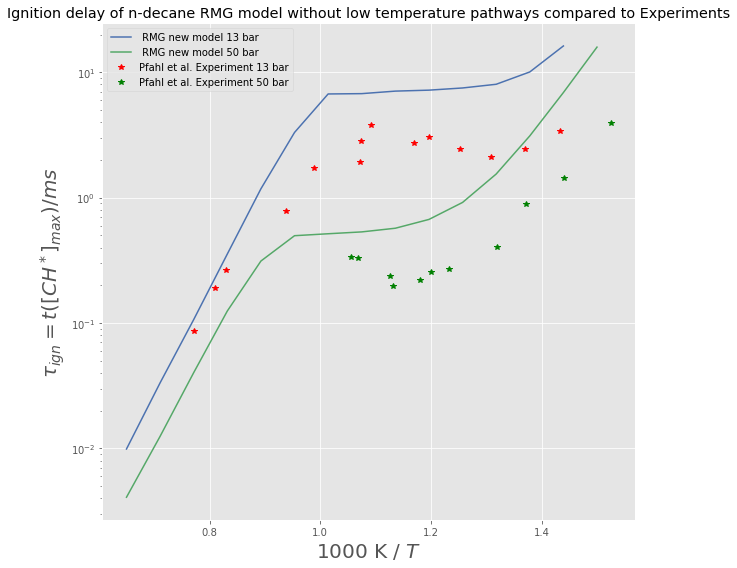

In [27]:


#plt.semilogy(temps, ign_times, 'g*', label='DC. Horning Experiment 1 atm')    


    
# for key, val in Zeng_results.items():
#     plt.semilogy(1000/RMG_temperatures_dkm, val, 'k--o', label= 'Zeng model {} bar'.format(key))
    


    
for P in pressures_bar:
    times = RMG_results[P]
    
    plt.semilogy(1000/RMG_temperatures_dkm,times,label=' RMG new model {} bar'.format(P))    
    
    
    
plt.semilogy(temps13,ign_times13, 'r*', label='Pfahl et al. Experiment 13 bar')
plt.semilogy(temps50, ign_times50, 'g*', label='Pfahl et al. Experiment 50 bar')




plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.title('Ignition delay of n-decane RMG model without low temperature pathways compared to Experiments')
plt.show

In [ ]:





# # #plt.semilogy(temps, ign_times, 'g*', label='DC. Horning Experiment 1 atm')

# plt.semilogy(1000/RMG_temperatures_dkm,times,label=' RMG model {} bar'.format(P))
# plt.legend(loc='best')
# plt.xlabel('1000 K / $T$')
# plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/\mu s$')
# plt.rcParams['figure.figsize'] = [10, 8]
# plt.title('Ignition delay of n-decane detailed kinetic model compared to reduced model compared to ST experiment')
# plt.show


    


In [ ]:
# plt.semilogy(temps,ign_times, 'r*', label='DC Horning Experiment 1 atm')
# plt.semilogy(1000/RMG_temperatures, times, 'o-', label='RMG model {0} atm'.format(pressures_bar))
    
# plt.legend(loc='best')
# plt.xlabel("1000 K / temperature")
# #plt.xlim(0.6,0.8)
# plt.ylabel("Ignition delay time $\\tau$ (ms)")
# plt.title('RMG model of Ignition delay of n-Decane at $\phi$=1.0')
# plt.show()   
# plt.rcParams['figure.figsize'] = [10, 8]

<function matplotlib.pyplot.show(*args, **kw)>

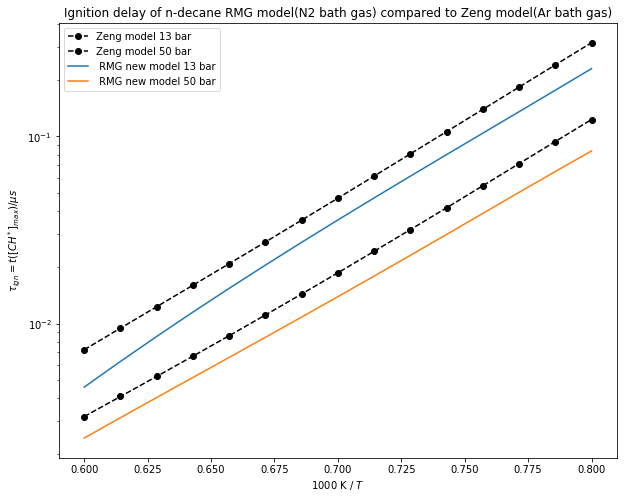

In [37]:
for key, val in Zeng_results.items():
    plt.semilogy(1000/RMG_temperatures_dkm, val, 'k--o', label= 'Zeng model {} bar'.format(key))
    


    
for P in pressures_bar:
    times = RMG_results[P]
    
    plt.semilogy(1000/RMG_temperatures_dkm,times,label=' RMG new model {} bar'.format(P))  
    
    
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/\mu s$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.title('Ignition delay of n-decane RMG model(N2 bath gas) compared to Zeng model(Ar bath gas)')
plt.show    